In [3]:
# Import used packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Introduction

Data: Medical appointments and its associated varaiables 
There are 14 variables
The target is to see which variables could be used as a predictor to know if a patient will show up or no

Data Variables:
<ol>
<li> Patient ID</li>
<li> Appointment ID</li>
<li> Gender: Male or Female. There are more females in the dataset</li>
<li> Scheduled Day: Actual appointment day</li>
<li> Appointment Day:when they register the appointment </li>
<li> Age </li>
<li> Neighbourhood: Where the appointment takes place </li>
<li> Scholarship (Boolen: 0 means No, 1 means Yes) </li>
<li> Hipertension (Boolen: 0 means No, 1 means Yes) </li>
<li> Diabetes (Boolen: 0 means No, 1 means Yes) </li>
<li> Alcoholism (Boolen: 0 means No, 1 means Yes) </li>
<li> Handcap (in the original data description on Kaggle it is Boolen: 0 means No, 1 means Yes but then I found that it has values more than 1, it means how many disabilites that the patient has. </li>
<li> SMS-recieved (The original data description on Kaggle show that it is the number of SMS sent to the patient but here I believe that it is Boolen: 0 means No, 1 means Yes as the values are 0 or 1 </li>
<li> No-show (Yes or No) </li>
</ol>
  
## Study questions:
When a person books an appointment, then he would go to the doctor but some patients don't show up on thier appointments. We analysis the dataset to answer the following questions:

<ol>
<li> Is age and gender can be a predictor for showing up ?</li>
<li> Is waiting time can be a predicto for showing up? </li>
</ol>

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Number of Columns and rows
df.shape

(110527, 14)

In [6]:
# Data statistics 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# Check the information of the dataset to the following
# 1- Number of non-null featuers (Data is clean there is no non-null values)
# 2- Datatypes of columns (change some columns type as date)
# 3- Clean Age column (Minimum value is -1 so I will drop these rows , check for zeros)
# 4- Handcap maximum value is 4, The data provider mentioned that this number indicate the number of disabilities that the person has so it is correct !
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# Drop the Patient ID and the Appointment ID as we don't need them 
df.drop(['PatientId',"AppointmentID"],axis=1,inplace=True)

In [9]:
# check the data after dropping the Patient ID and the Appointment ID 
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Remove age less than zero (Considering that there is new born)
df=df[df['Age']>=0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


In [11]:
# Change the date from object to date time to be able to use it 
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])
df["Waiting_time"]=(df["AppointmentDay"]-df["ScheduledDay"])
df['Waiting_Hours'] = df['Waiting_time'] / np.timedelta64(1, 'h')
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_time,Waiting_Hours
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,-18.635556
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,-16.140833
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,-16.317778
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,-17.491944
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,-16.123056


In [12]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Waiting_time,Waiting_Hours
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,9 days 17:08:42.047952,233.145013
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15 days 05:51:31.240428,365.858678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7 days +10:10:40,-157.822222
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +15:41:32,-8.307778
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 11:22:33,83.375833
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14 days 07:41:37.750000,343.693819
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:19:01,4285.316944


In [13]:
# it looks that all the appointment were registered at 00:00:00. They don't have a registered hour.
# Some of the waiting time is negative so I will drop these rows.
df=df[df['Waiting_Hours']>=0]


In [14]:
# Check that they are changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71959 entries, 5 to 110526
Data columns (total 14 columns):
Gender            71959 non-null object
ScheduledDay      71959 non-null datetime64[ns]
AppointmentDay    71959 non-null datetime64[ns]
Age               71959 non-null int64
Neighbourhood     71959 non-null object
Scholarship       71959 non-null int64
Hipertension      71959 non-null int64
Diabetes          71959 non-null int64
Alcoholism        71959 non-null int64
Handcap           71959 non-null int64
SMS_received      71959 non-null int64
No-show           71959 non-null object
Waiting_time      71959 non-null timedelta64[ns]
Waiting_Hours     71959 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(7), object(3), timedelta64[ns](1)
memory usage: 8.2+ MB


In [15]:
# features with missing values 
# It is clear from the previous step that there is no null values 
# However we do double check
df.isnull().values.ravel().sum()


0

In [16]:
# Check for duplicates
len(df)-len(df.drop_duplicates())


550

In [17]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71409 entries, 5 to 110526
Data columns (total 14 columns):
Gender            71409 non-null object
ScheduledDay      71409 non-null datetime64[ns]
AppointmentDay    71409 non-null datetime64[ns]
Age               71409 non-null int64
Neighbourhood     71409 non-null object
Scholarship       71409 non-null int64
Hipertension      71409 non-null int64
Diabetes          71409 non-null int64
Alcoholism        71409 non-null int64
Handcap           71409 non-null int64
SMS_received      71409 non-null int64
No-show           71409 non-null object
Waiting_time      71409 non-null timedelta64[ns]
Waiting_Hours     71409 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(7), object(3), timedelta64[ns](1)
memory usage: 8.2+ MB


In [20]:
# Number of Show and No show
# More than double the patient show up in their appointments
df.groupby('No-show').count()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Waiting_time,Waiting_Hours
No-show,,,,,,,,,,,,,
No,51092,51092,51092,51092,51092,51092,51092,51092,51092,51092,51092,51092,51092
Yes,20317,20317,20317,20317,20317,20317,20317,20317,20317,20317,20317,20317,20317


In [21]:
# Number of SMS-Received Patients
# half the patient received SMS and the other half not
df.groupby('SMS_received').count()
# Here I consider that SMS_received is a binary (0: means No, 1: means:yes)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show,Waiting_time,Waiting_Hours
SMS_received,,,,,,,,,,,,,
0,35927,35927,35927,35927,35927,35927,35927,35927,35927,35927,35927,35927,35927
1,35482,35482,35482,35482,35482,35482,35482,35482,35482,35482,35482,35482,35482


In [22]:
# Change No show values from string to integers 
# Replace Yes=1 and No=0
df.replace({'Yes': 1, 'No': 0},inplace=True)


In [23]:
# Change Gender values from string to integers 
# Replace M=1 and F=0
df.replace({'M': 1, 'F': 0}, inplace=True)


In [24]:
# check data after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71409 entries, 5 to 110526
Data columns (total 14 columns):
Gender            71409 non-null int64
ScheduledDay      71409 non-null datetime64[ns]
AppointmentDay    71409 non-null datetime64[ns]
Age               71409 non-null int64
Neighbourhood     71409 non-null object
Scholarship       71409 non-null int64
Hipertension      71409 non-null int64
Diabetes          71409 non-null int64
Alcoholism        71409 non-null int64
Handcap           71409 non-null int64
SMS_received      71409 non-null int64
No-show           71409 non-null int64
Waiting_time      71409 non-null timedelta64[ns]
Waiting_Hours     71409 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(9), object(1), timedelta64[ns](1)
memory usage: 8.2+ MB


In [25]:
# check the changes
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_time,Waiting_Hours
5,0,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,1 days 15:23:09,39.385833
6,0,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,1 days 08:54:48,32.913333
7,0,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,1 days 08:20:02,32.333889
9,0,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,1 days 11:11:35,35.193056
10,0,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,0,1 days 09:01:49,33.030278


# Explore the data

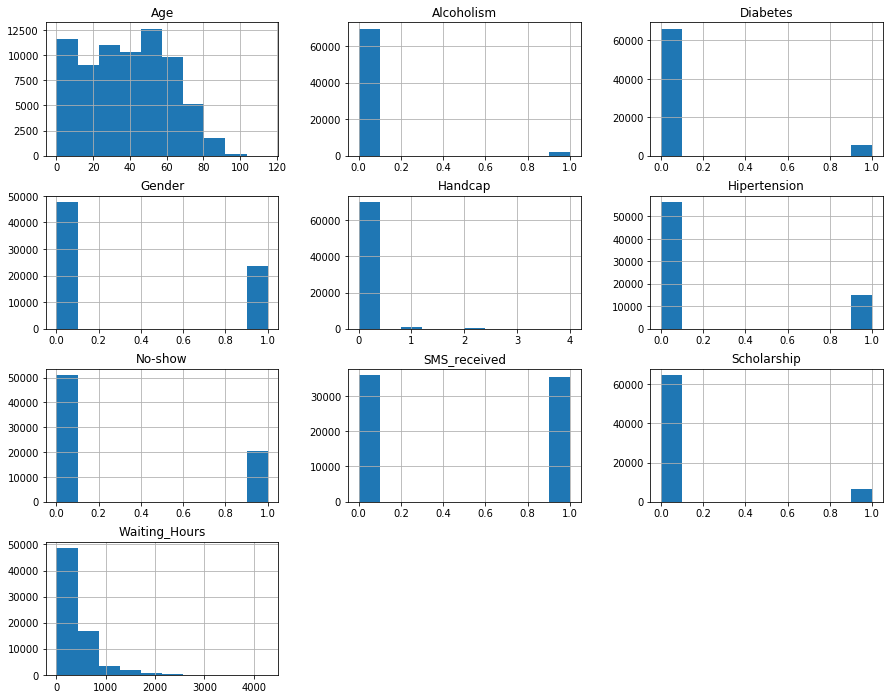

In [26]:
df.hist(figsize=(15,12));
# The majority of the patients are under 50 years old.
# The Majority don't have Alcoholism, Diabetes, Handcap, and No schoalrship
# almost all received SMS
# 28% No-show

In [37]:
# Check which Neighbourhood has the highest and lowest number of patients
grouped_df=df.groupby(df["Neighbourhood"]).count()
maximums = grouped_df.max()
minimums = grouped_df.min()


In [34]:
# Min number of patients in the Neighbourhood
grouped_df['No-show'].min()

2

In [35]:
# Neighbourhood with the min number of patients
grouped_df.idxmin()

Gender            ILHAS OCEÂNICAS DE TRINDADE
ScheduledDay      ILHAS OCEÂNICAS DE TRINDADE
AppointmentDay    ILHAS OCEÂNICAS DE TRINDADE
Age               ILHAS OCEÂNICAS DE TRINDADE
Scholarship       ILHAS OCEÂNICAS DE TRINDADE
Hipertension      ILHAS OCEÂNICAS DE TRINDADE
Diabetes          ILHAS OCEÂNICAS DE TRINDADE
Alcoholism        ILHAS OCEÂNICAS DE TRINDADE
Handcap           ILHAS OCEÂNICAS DE TRINDADE
SMS_received      ILHAS OCEÂNICAS DE TRINDADE
No-show           ILHAS OCEÂNICAS DE TRINDADE
Waiting_time      ILHAS OCEÂNICAS DE TRINDADE
Waiting_Hours     ILHAS OCEÂNICAS DE TRINDADE
dtype: object

In [28]:
# Man number of patients in the Neighbourhood
grouped_df['No-show'].max()

5130

In [38]:
# Neighbourhood with the max number of patients
grouped_df.idxmax()

Gender            JARDIM CAMBURI
ScheduledDay      JARDIM CAMBURI
AppointmentDay    JARDIM CAMBURI
Age               JARDIM CAMBURI
Scholarship       JARDIM CAMBURI
Hipertension      JARDIM CAMBURI
Diabetes          JARDIM CAMBURI
Alcoholism        JARDIM CAMBURI
Handcap           JARDIM CAMBURI
SMS_received      JARDIM CAMBURI
No-show           JARDIM CAMBURI
Waiting_time      JARDIM CAMBURI
Waiting_Hours     JARDIM CAMBURI
dtype: object

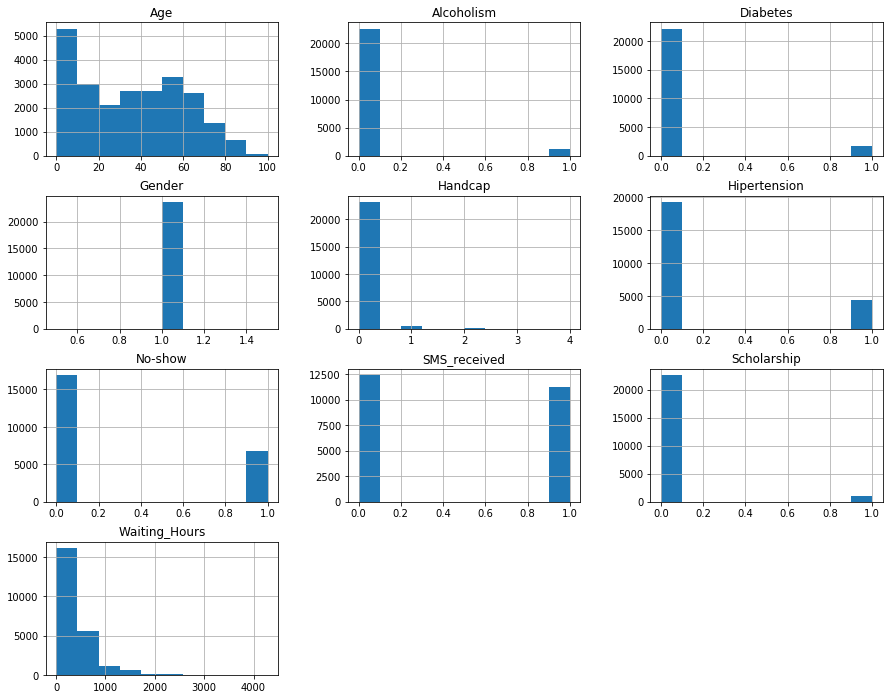

In [39]:
# Try to see if there is a trend based on Gender
# Statistics for males
df[df.Gender==1].hist(figsize=(15,12));
# As we see from the graph
# There are more young males 
# most of the men don't have Alcoholism, Diabetes, Handcap, Schholarship


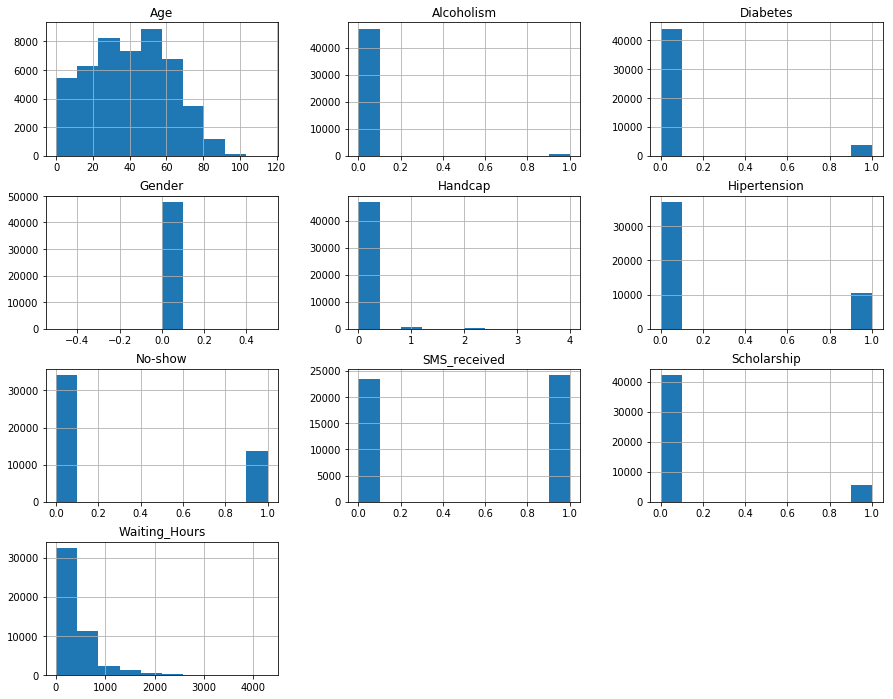

In [40]:
# Statistics for females
# As we see from the graph
# Women are older than men 
# most of the women don't have Alcoholism, Diabetes, Handcap, Schholarship
df[df.Gender==0].hist(figsize=(15,12));

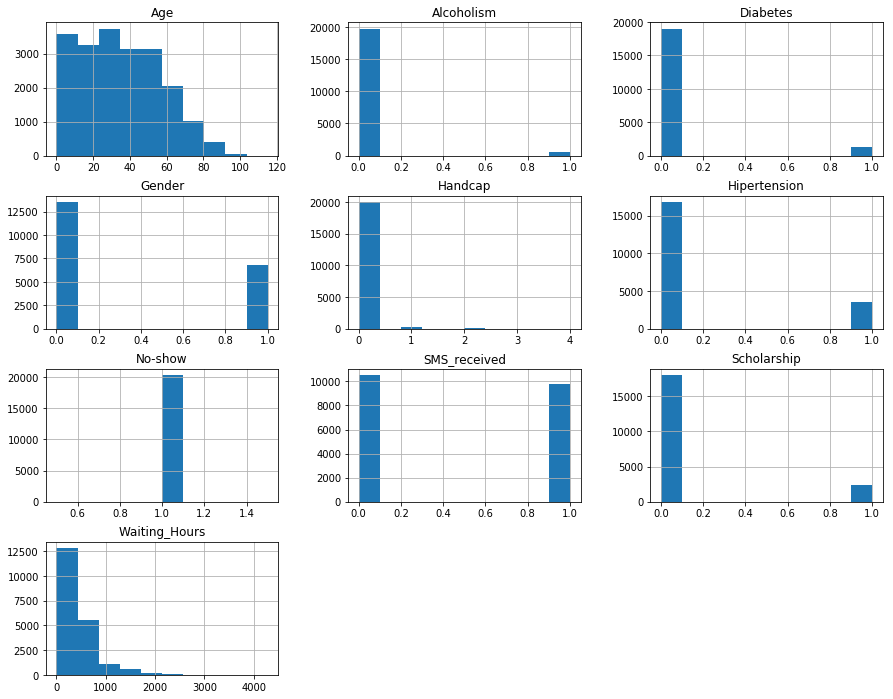

In [41]:
# Statistics for No show is yes
df[df['No-show'] ==1].hist(figsize=(15,12));
# There is a clear difference in the Gender, More women (No-show=Yes) than men but this is not completely correct as the number
# of women is more than men. By comparing the number (No-show=yes) with the total number of men and women respectively. There is no big difference


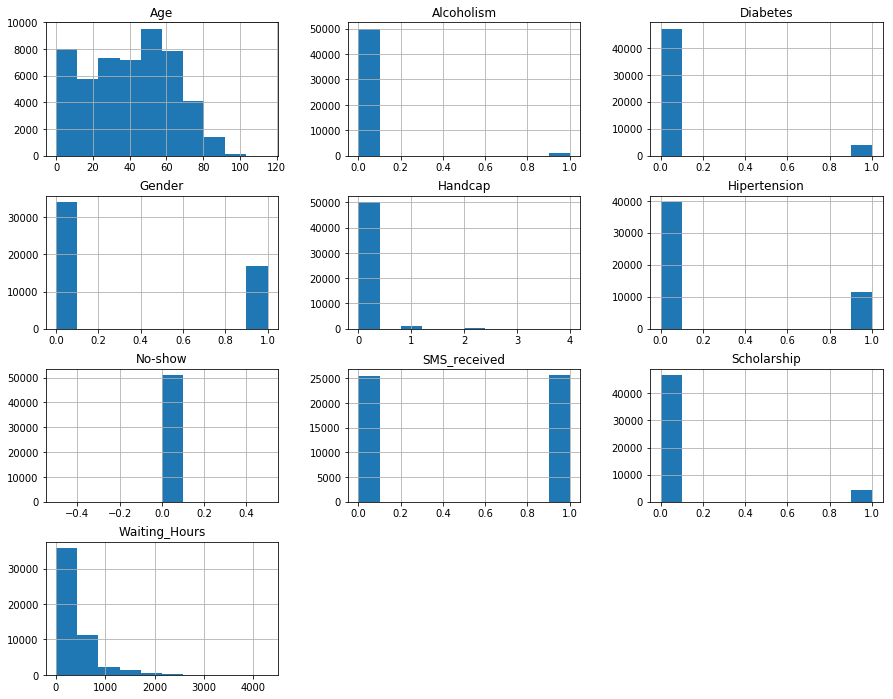

In [42]:
# Statistics for No show is No
df[df['No-show'] ==0].hist(figsize=(15,12));

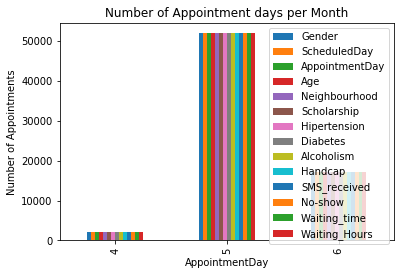

In [102]:
# Which month has the biggest AppointmentDay.
df.groupby(df["AppointmentDay"].dt.month).count().plot(kind="bar",title="Number of Appointment days per Month");
plt.ylabel("Number of Appointments");

# Most of the Appointment where in May

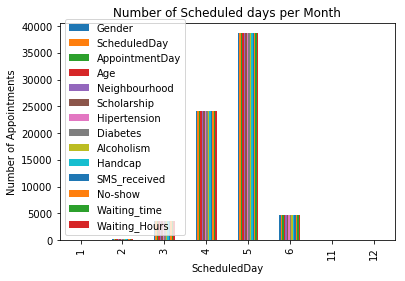

In [103]:
# Which month has the biggest ScheduledDay.
df.groupby(df["ScheduledDay"].dt.month).count().plot(kind="bar",title="Number of Scheduled days per Month");
plt.ylabel("Number of Appointments");
# Most of the Scheduled day where in May

Alcoholism, Diabetes, Handicap, Hypertension, Scholarship are not predictors for show up or not.
Age, Gender and waiting hours could be a predictors. Therefore, we will have a deeper look on them. 


# Question 1: Is age and gender can be a predictor for showing up ?

# Age

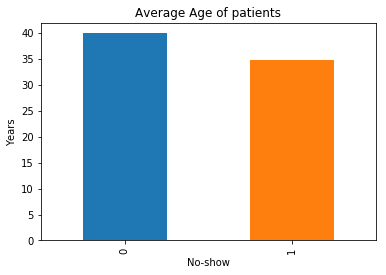

In [55]:
ax=df.groupby("No-show").Age.mean().plot(kind='bar');
plt.title("Average Age of patients");
plt.ylabel("Years");
# Patients who No-show=No are older than patients with No-show=Yes
# Older patients tend to show

In [50]:
# divide the dataframe into two dataframes based on No-show
df_show=df[df['No-show']==0]
df_Noshow=df[df['No-show']==1]
df_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_time,Waiting_Hours
5,0,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,1 days 15:23:09,39.385833
9,0,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,1 days 11:11:35,35.193056
10,0,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,0,1 days 09:01:49,33.030278
12,0,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,0,0 days 12:26:09,12.435833
13,1,2016-04-28 14:52:07,2016-04-29,28,NOVA PALESTINA,0,0,0,0,0,0,0,0 days 09:07:53,9.131389


In [51]:
# Mask the dataset to two seperate dataframes based on the No-show
No_show= df["No-show"]==1
show= df["No-show"]==0

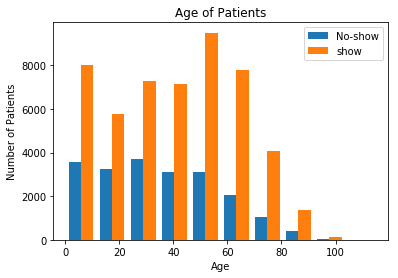

In [56]:
plt.hist([df.Age[No_show], df.Age[show]], label=['No-show', 'show'])
plt.title("Age of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.legend(loc='upper right')
plt.show()
#older people tend to show

In [57]:
print("Mean age of patients who show {}".format(df_show.Age.mean()))
print("Mean age of patients who No-show {}".format(df_Noshow.Age.mean()))


Mean age of patients who show 39.98416581852345
Mean age of patients who No-show 34.80085642565339


Older patients tend to show. That can be explained that old patients are responsible and they would like to make a medical check even if they don't feel that sick but the young patients may be they feel better in the long waiting time so they don't show up. 
Age can be a predictor wether a patient show up or not for his appointment 

# Gender

In [62]:
# Number of males who No-show
Male_noshow=df.Gender[No_show].sum()

In [63]:
# Number of males who show
Male_show=df.Gender[show].sum()

In [64]:
Num_male_total=Male_noshow+Male_show

In [65]:
print("Number of male who show: {}".format(Male_show))
print("Number of male who Noshow: {}".format(Male_noshow))
print("Total number of males: {}".format(Num_male_total))
print("{} of the male patient No-show".format(Male_noshow/Num_male_total))
print ("{} of the male patient show".format(Male_show/Num_male_total))

Number of male who show: 16932
Number of male who Noshow: 6773
Total number of males: 23705
0.2857203121704282 of the male patient No-show
0.7142796878295719 of the male patient show


In [66]:
# Number of Females who didn't show
Female_noshow=df.Gender[No_show].count()-df.Gender[No_show].sum()
print(df.Gender[No_show].count()-df.Gender[No_show].sum())

13544


In [67]:
# Number of Females who show
Female_show=df.Gender[show].count()-df.Gender[show].sum()
print(df.Gender[show].count()-df.Gender[show].sum())

34160


In [68]:
Num_female_total=Female_noshow+Female_show

In [69]:
print("Number of female who show: {}".format(Female_show))
print("Number of female who Noshow: {}".format(Female_noshow))
print("Total number of females: {}".format(Num_female_total))
print("{} of the female patient No-show".format(Female_noshow/Num_female_total))
print ("{} of the female patient show".format(Female_show/Num_female_total))

Number of female who show: 34160
Number of female who Noshow: 13544
Total number of females: 47704
0.28391749119570686 of the female patient No-show
0.7160825088042931 of the female patient show


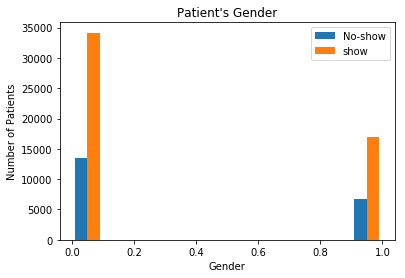

In [75]:
plt.hist([df.Gender[No_show], df.Gender[show]], label=['No-show', 'show'])
plt.title("Patient's Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.legend(loc='upper right')
plt.show()
#We can't see a difference from the figure between males and females who show up or not

28% of males and females respectively tend to noshow
There are more number of female patients which show that females take care more about their health
Gender isn't a predictor wether a patient show up or not for his appointment 

# Question 2: Is waiting time can be a predicto for showing up?

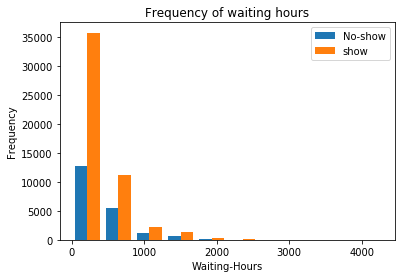

In [89]:
plt.hist([df_Noshow['Waiting_Hours'], df_show['Waiting_Hours']], label=['No-show', 'show']);
plt.xlabel("Waiting-Hours")
plt.ylabel("Frequency")
plt.title("Frequency of waiting hours")
plt.legend()
plt.show()

In [91]:
print("Mean waiting hours for patient who didn't show up is {}".format(df_Noshow['Waiting_Hours'].mean()))
print("Mean waiting hours for patient who show up is {}".format(df_show['Waiting_Hours'].mean()))


Mean waiting hours for patient who didn't show up is 401.0214956276353
Mean waiting hours for patient who show up is 348.7201956274955


From the figure there is no clear distibution to use waiting hours as a predictor for show or no-show.
Patient who show up had lower waiting hours that patient who didn't show up. Increasing the waiting hours increase the probability that a patient would not show up


<a id='conclusions'></a>
## Conclusions



### Limitatins

The dataset has the following problems:

<ol>
<li> Some of the appointment days are before the day that they were registered ?</li>
<li> It is not clear what type of disability the patients had </li>
<li> The dataset is different from its description on Kaggle for example the SMS_received should show the number of SMS that the patient had received but in the dataset it represent if the patient received a SMS or not.   </li>
<li> Same for the handcap column. It should represent if the patient is handicapped or not but in the dataset it indicates how many disabilities that the patient had. </li>
<li> It would be helpful if the dataset includes No-show history for every patient </li>
    

   
</ol>

As a conclusion, age can be used as a predictor to predict if a patient would show up or not. Old patients tend to show up in their appointment time. Reducing the waiting time is increasing the propability that the patient show up in the appointment. More advertisments should focus on females as they are visiting doctors more than the males. 
Other features don't show a difference between show and No-show patients.

In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0